<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%208%EC%9D%BC/12%EC%9B%94_8%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# K-Means 비지도학습을 해 보아요!
# 필요한 module import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

<function matplotlib.pyplot.show(close=None, block=None)>

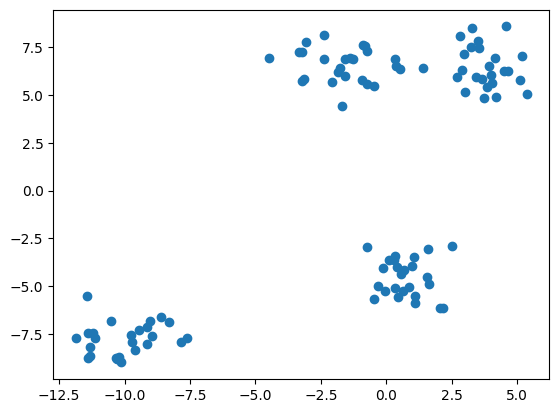

In [ ]:
# 데이터부터 만들어요. 랜덤하게 생성할거에요!
# 군집형태로 되어있는 랜덤데이터를 생성할 거에요!

points, labels = make_blobs(n_samples=100,
                            centers=4,
                            n_features=2,
                            random_state=100)
points.shape
labels.shape

# 랜덤으로 생성된 데이터를 2차원 평면에 Scatter를 이용해서
# 표현해 보아요!
plt.scatter(points[:,0], points[:,1])
plt.show

In [ ]:
# K-Means는 hyperparameter가 k값, 클러스터의 개수
# n_init : k-means 알고리즘을 여러번 실행해 가장 좋은 경우를 선택
#          초기값은 10, 과거에는 이 값을 우리가 설정했는데
#          왠만하면 auto라는 값으로 설정하는게 좋아요!

# model 설정
kmeans_cluster = KMeans(n_clusters=4,
                        n_init='auto',
                        random_state=100)

# model이 만들어졌으니 이제 학습을 해야겠죠
kmeans_cluster.fit(points)

# labels_ : 클러스터값
# 각각의 데이터가 어떤 클러스터에 속하는지 알려줌
kmeans_cluster.labels_


array([1, 3, 3, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2,
       2, 0, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 0, 2, 1, 3, 0, 3,
       2, 2, 3, 3, 1, 0, 1, 2, 0, 3, 1, 1, 2, 3, 3, 2, 1, 0, 2, 1, 1, 0,
       2, 0, 2, 1, 0, 3, 0, 1, 2, 3, 3, 3, 0, 1, 0, 0, 0, 3, 1, 2, 0, 0,
       2, 3, 0, 3, 3, 1, 0, 1, 0, 3, 1, 0], dtype=int32)

In [ ]:
# clustering한 결과를 시각화!
my_color = {0:'red', 1:'blue', 2:'green', 3:'margenta'}

# scatter를 각 cluster 마다 반복적으로 그리면 되요!
for n in range(4):
    cluster_sub_points = points[kmeans_cluster.labels_== n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend
plt.show()

In [ ]:
# predict
new_point = np.array([[0.0,0.0]])
cluster_result = kmeans_cluster.predict(new_point)
cluster_result

array([2], dtype=int32)

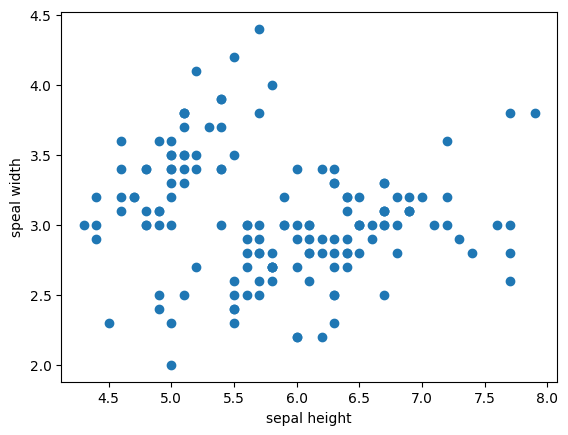

In [ ]:
# 랜덤데이터를 이용해서 K-Means 알고리이 동작하는걸
# 확인해봤어요!

# 우리가 알고있는 데이터를 한번 이용해 보아요!
# iris(붓꽃 데이터)를 이용해서 clustering을 해 보아요!

# iris data는
# 독립변수가 4개에요, 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비
# 종속변수가 있어요! 3가지 종류가 있어 => 다중분류 예제로 많이 사용

# 독립변수를 4개 사용하면 2차원 평면에 그림을 그릴 수 없어요!
# 2차원 평면에 클러스터링된 결과를 확인하기 위해
# 꽃받침길이, 너비 두 개의 feature만 사용해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
sample = iris.data

# 일단 그래프를 한번 그려 보아요!
x = sample[:,0]
y = sample[:,1]
plt.xlabel('sepal height')
plt.ylabel('speal width')
plt.scatter(x,y)
plt.show()

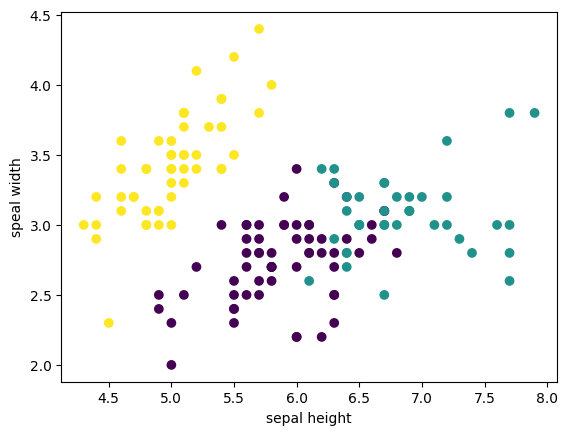

In [ ]:
model = KMeans(n_clusters=3,
               n_init='auto')

# 학습을 진행
model.fit(sample)

# predict()를 이용해서 예측을 해보아요!
labels = model.predict(sample)
labels

x = sample[:,0]
y = sample[:,1]
plt.xlabel('sepal height')
plt.ylabel('speal width')
plt.scatter(x,y,c=labels)
plt.show()

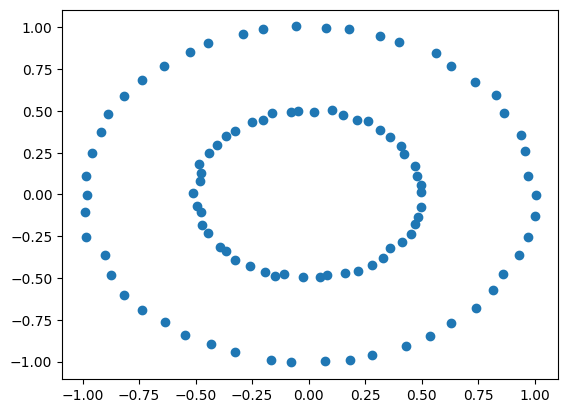

In [ ]:
# iris data set으로 clustering이 되는걸 확인해 봤어요!
# 잘 동작하는 거 같아요
# 왠만한 clustering을 위한 학습과 예측은 K-Means 알고리즘으로 해결 가능!

# 그런데 문제가 하나 있어요
# 주어진 데이터 분포에 따라 의도치 않은 상황이 발생할 수 있어요
# 알고리즘의 특성 때문에 그래요!

# 이런 형태(K-Means로 clustering이 잘 되지 않는 경우)는 크게 3가지!
# 1. 데이터가 원형 데이터인 경우에는 KMeans가 정상적으로 동작하지 않아요
# 정확히 말하면 KMeans는 잘 작동하지만, 우리가 원하는 clustering 결과가 나오지 않는다!
# 예를 들어보아요!

from sklearn.datasets import make_circles

# 이 함수는 두개의 원으로 이루어진 데이터 생성
# n_samples : 데이터의 총 개수
# factor : 값이 0에 가까울수록 두 원의 거리가 멀어지는 걸 의미(1에 가까워지면 반대!)
# noise : 데이터에 추가되는 무작위 noise의 양을 지칭(noise 값이 커지면 원의 크기가 이상해진)
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)
circle_points.shape
circle_labels.shape

plt.scatter(circle_points[:,0],circle_points[:,1])
plt.show()

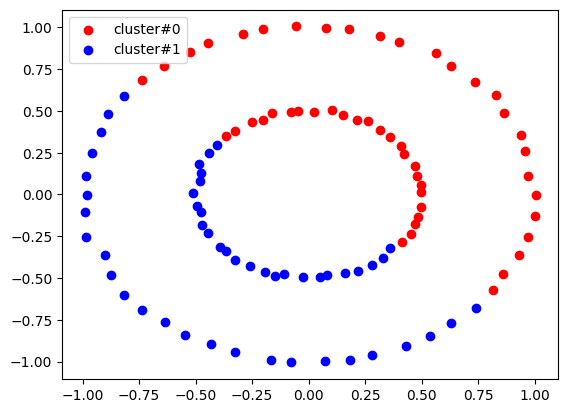

In [ ]:
circle_model = KMeans(n_clusters=2,
                      n_init='auto')

circle_model.fit(circle_points)
my_color ={0 : 'red', 1 : 'blue'}

for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

# 결과를 확인했더니 원형 데이터 분포는 K-Means 알고리즘이
# 잘 동작하지 않아요! 클러스터를 정상적으로 나누는거 같지 않아요!

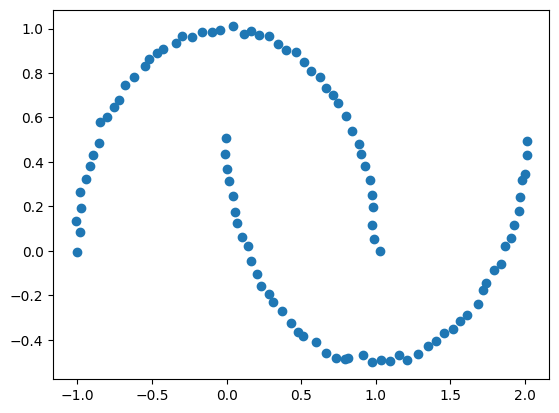

In [ ]:
# 또 다른 경우를 알아보죠. 두 번째에요!
from sklearn.datasets import make_moons
moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)
plt.scatter(moon_points[:,0], moon_points[:,1])
plt.show()

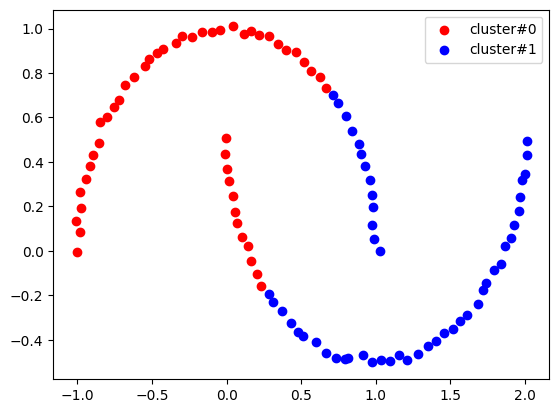

In [ ]:
moon_model = KMeans(n_clusters=2,
                      n_init='auto')

moon_model.fit(moon_points)
my_color ={0 : 'red', 1 : 'blue'}

for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

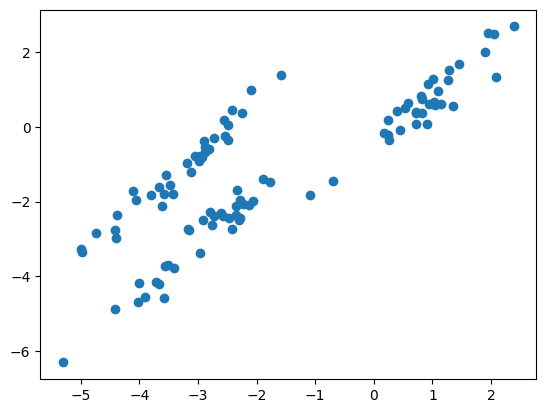

In [ ]:
# 세번째 데이터 분포에요!
# 대각선 모양의 데이터에 대해 클러스터링이 잘 되지 않아요!

from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                                 random_state=170)

# 대각 행렬을 이용해서 데이터를 대각선 분포로 변경
transformation = [[0.6,0.6],
                  [-0.4,-0.8]]
diag_points = np.dot(diag_points, transformation)

plt.scatter(diag_points[:,0], diag_points[:,1])
plt.show()

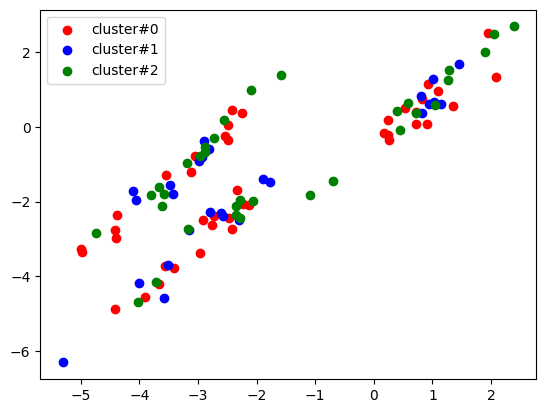

In [ ]:
diag_model = KMeans(n_clusters=3,
                      n_init='auto')

diag_model.fit(diag_points)
my_color ={0 : 'red', 1 : 'blue', 2 : 'green'}

for n in range(3):
    cluster_sub_points = diag_points[diag_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

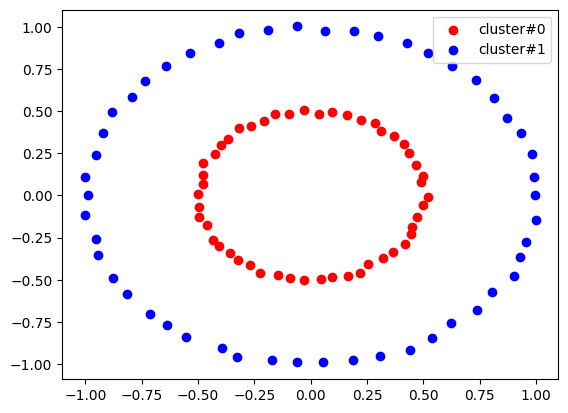

In [ ]:
#DBSCAN을 이용해서 해결 KMeans에서 못한거

from sklearn.datasets import make_circles

# 이 함수는 두개의 원으로 이루어진 데이터 생성
# n_samples : 데이터의 총 개수
# factor : 값이 0에 가까울수록 두 원의 거리가 멀어지는 걸 의미(1에 가까워지면 반대!)
# noise : 데이터에 추가되는 무작위 noise의 양을 지칭(noise 값이 커지면 원의 크기가 이상해진)
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)
circle_points.shape
circle_labels.shape

# plt.scatter(circle_points[:,0],circle_points[:,1])
# plt.show()

epsilon=0.2
minPts = 3

from sklearn.cluster import DBSCAN
circle_model = DBSCAN(eps=epsilon,
                      min_samples=3)
circle_model.fit(circle_points)

# cluster의 수는 몇개가 나오나요?
max(circle_model.labels_)+1


my_color ={0 : 'red', 1 : 'blue'}

for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

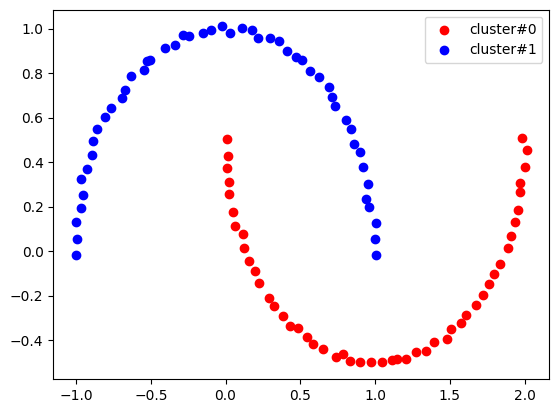

In [ ]:
from sklearn.datasets import make_moons
moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)
# plt.scatter(moon_points[:,0], moon_points[:,1])
# plt.show()

epsilon=0.2
minPts = 3

moon_model = DBSCAN(eps=epsilon,
                    min_samples=3)

moon_model.fit(moon_points)
my_color ={0 : 'red', 1 : 'blue'}

for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

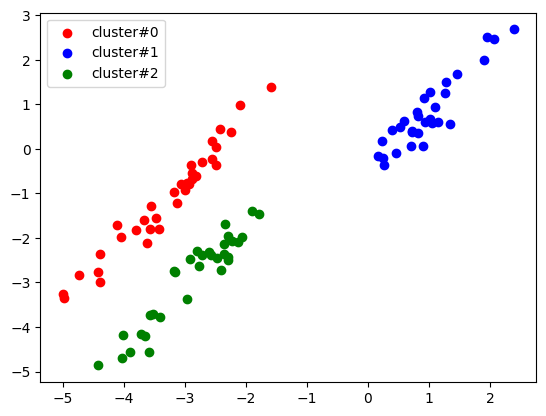

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
diag_points, _ = make_blobs(n_samples=100,
                                 random_state=170)

# 대각 행렬을 이용해서 데이터를 대각선 분포로 변경
transformation = [[0.6,0.6],
                  [-0.4,-0.8]]
diag_points = np.dot(diag_points, transformation)

# plt.scatter(diag_points[:,0], diag_points[:,1])
# plt.show()

epsilon=0.7
minPts= 3
diag_model = DBSCAN(eps=epsilon,
                    min_samples=3)

diag_model.fit(diag_points)
my_color ={0 : 'red', 1 : 'blue', 2 : 'green'}

for n in range(3):
    cluster_sub_points = diag_points[diag_model.labels_==n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

In [ ]:
# 차원축소 기법 중 주성분 분석(PCA)에 대해 알아보아요
# 사용할 예제는 iris!
# 아시다시피 iris는 3가지 품종이 있어요!
# 각 품종을 결정짓는 요소는 4가지가 있어요
# 꽃받침(sepal)의 길이와 너비, 꽃잎(petal)의 길이와 너비

# 이 데이터를 차원축소예제로 드는 이유는...
# 독립변수에 대해 상관관계 분석을 해 보면 상관계수가 높은 feature 존재!
# 이런 경우 차원축소를 이용하면 훨씬 더 좋은 효과를 얻을 수 있어요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Raw Data Loading
iris = load_iris()

iris_df = pd.DataFrame(iris.data,
                       columns=['sepal_length','sepal_width',
                                'petal_length', 'petal_width'])
iris_df.head()

# 상관관계 분석
iris_df.corr()
# feature간에 연관성이 깊어요!

# 따라서 주성분분석(PCA)을 통해 차원을 축소해서 사용하면
# 약간의 데이터 loss가 발생하겠지만 모델의 복잡도가 줄고
# overfitting도 줄어들어 더 좋은 모델이 만들어 질 수 있어요!

# 주성분을 몇개로 하면 좋을까요???
# 주성분의 분산을 계산해서 사용해요!

from sklearn.decomposition import PCA
pca = PCA(random_state=1004)  # 주성분의 개수를 안줬다! -> 그대로 사용한다는 의미
                              # 차원을 축소하지는 않아요
pca.fit_transform(iris_df)
pca.explained_variance_ratio_  # 주성분의 분산비율을 알려줘요
# [0.92461872, 0.05306648, 0.01710261, 0.00521218]

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
# 원래 iris 데이터는 4개의 feature로 구성
# 종속변수를 가지고 있어요(붓꽃의 품종)
# 이전 다중분류할 때, 이용했었는데
# 그거 다시 한번 실행해서 원래 데이터 정확도 산출!


# 차원축소 해서 2개의 주성분으로 줄여요!
# 이렇게 데이터 변환한 다 다중분류 모델 만들
# 학습하고 정확도 산출

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Raw Data Loading
iris = load_iris()
x_data = iris.data
t_data = iris.target

# 결측치와 이상치는 처리하지 않아요
# 정규화 진행
scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 사용하여 차원축소부터 먼저 하죠
n_components = 2  # 주성분을 2개로 해요!
pca = PCA(n_components = n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)

x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)


# 다중분류 위한 모델 만들어요
sklearn_model = LogisticRegression()
sklearn_model.fit(x_data_train_norm_pca,
                  t_data_train)

# Evaluation을 위해 모델의 예측치를 알아내요!
predict = sklearn_model.predict(x_data_test_norm_pca)

accuracy = accuracy_score(t_data_test,predict)
accuracy  # 0.9333333333333333



0.9333333333333333

In [ ]:
# 원래 데이터를 가지고 모델 만들어
# 정확도 계산해 결과 비교

# 정규화 진행
scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

# 모델 생성
model = LogisticRegression()

# 학습
model.fit(x_data_train_norm,
          t_data_train)
predict = model.predict(x_data_test_norm)

accu = accuracy_score(t_data_test,predict)
accu  # 0.9555555555555556

0.9555555555555556

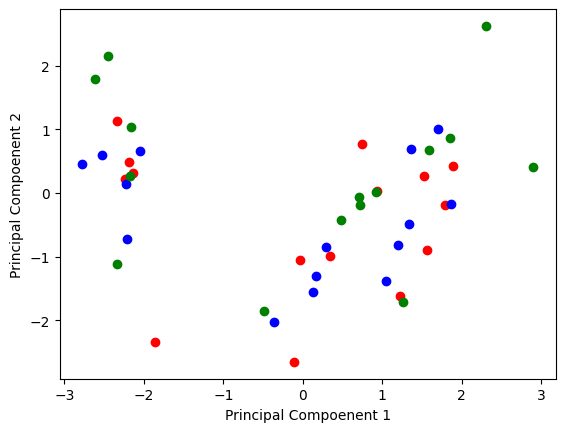

In [ ]:
my_color = {0:'red', 1:'blue',2:'green'}
for n in range(3):
    plt.scatter(x_data_test_norm_pca[t_data_test == n,0],
                x_data_test_norm_pca[t_data_test == n,1],
                color=my_color[n])
plt.xlabel('Principal Compoenent 1')
plt.ylabel('Principal Compoenent 2')
plt.show()